In [85]:
# Automation Setup
# Version: 0.1
#
# Copy and paste this as 1st cell into Your workbook to start making automation notebook
# Use the Factory.ipynb page to create new steps
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)

try:
    test = time.time()
except:
    import pyperclip
    import platform
    import time
    import pyautogui as gui
    import io
    import cv2
    import numpy as np
    import codecs
    import dill
    import pandas as pd
    import pyarrow.feather as feather
    from ipywidgets import widgets, Image, Output

class step:
    """
    Empire AI step protocol 0.1
    Inputs step('''xxx''', tries=3, timer=1, gate=1, bbox=None)
    Output step.locations (tuples of x,y in screen space)
    
    """
    def __init__(self, payload, tries=3, timer=1, gate=1, bbox=None, kill_on_fail=True):
        self.payloads = dill.loads(codecs.decode(payload.encode(), "base64"))
        self.pattern_img = self.payloads[0]
        self.offset = self.payloads[1]
        self.kill_on_fail = kill_on_fail
        self.version = 0.1
        
        # Try to find the pattern
        for counter in range(tries):
            self._find_()
            # If enough instances have been found break out of the loop and execute next cell
            if len(self.locations) >= gate:
                print("found: "+str(self.locations))
                break
            else:
                time.sleep(timer)
        
        # If the pattern is not found within timeout
        if len(self.locations) < gate:
            pr.style={'bar_color': '#800000'}
            pl.value="[STOPPED] could not find"
            print("EXCEPTION: Gate condition not met!")
            if kill_on_fail:
                pr.style={'bar_color': '#808000'}
                raise Exception("Gate condition not met!")
        
    def _find_(self):
        """
        Find pattern on the screen as many instances as possible
        save all found locations into self.locations with correct click offset
        """
        
        self.locations = []
        locations_found = gui.locateAllOnScreen(self.pattern_img)
        offset = self.payloads[1]
        
        for loc in locations_found:
            self.locations.append((loc.left+offset[0],loc.top+offset[1]))
            
def os_ctrl(short=False):
    """
    Control buton string replacement to be used with pyautogui lib
    in win/linux it is ctrl and osx cmd/command
    """
    if platform.system() == 'Darwin':
        if short:
            return 'cmd'
        else:
            return 'command'
    else:
        return 'ctrl'
    
# Initalize progress bar and show it the notebook is ran standalone
try:
    pr.value = 0
    pr.style={'bar_color': None}
    #pl.value = ""
except:
    pr = widgets.IntProgress(min=0,max=100,layout=widgets.Layout(width='90%'), description="progress: ")
    pl = widgets.Label(description="debug")
    pr.value = 0 
# for cleaness sake lets keep all the return values in one library
r = {}

# right click, create new view for output to have this as progress overview
widgets.VBox([pr,pl])

In [94]:
# test if the required paramteers are avaiable
# if not then add default values
try:
    test = inputparameters
except:
    print("using default paramteres\n  to use your own inputparameters use 'query' as a 1st part of the string and 'input' as second part")
    inputparameters = {}
try:
    test = inputparameters['query']
    print("using custom query: "+inputparameters['query'])
except:
    print("using default paramteres\n  to use your own inputparameters use 'query' as a 1st part of the string and 'input' as second part")
    inputparameters['query'] = "Can you generate 3 Instagram comment suggestions based on Instagram post image descriptions as provided by AI algorithm as input below. The comments should be witty with a punchline addressing lighting or color - be supportive and incite trying new things. Following is the input but ignore the following words in the input: vfx, renaissance, painting \nFormat the output as python list and provide no description as answer\ninput: "
    
try:
    test = inputparameters['input']
    print("using custom input: "+inputparameters['input'])
except:
    print("using default paramteres\n  to use your own inputparameters use 'query' as a 1st part of the string and 'input' as second part")
    inputparameters['input'] = "image of evrything and nothing at once"
    

select promt

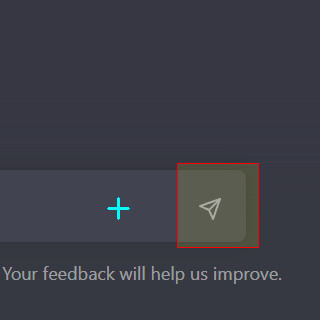

In [87]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASV+08AAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLUUtUhpROQrxPAAAyND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND4zND8yND40NT8zNT40NT8zNT40NT8zNT40NT8zNT40NT8zNT40NUAzNT80NUAzNT80NUAzNT80NUAzNT80NUAzNT80NUA0Nj81NkA0Nj81NkA0Nj81NkE0NkAyND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8yND4zNT8zNT40NT8zNT40NT8zNT40Nj8zNT40NkAzNT80NkAzNT80NkAzNT80NkAzNT80NkAzNT81N0A0Nj81N0A0Nj81N0E0NkAyND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND4zND4yMz0zND4yND8zND8yMz4zND8yND8zND8yMz4zND8yND8zND8yMz4zND8yND80NT8zND40NT8zNT80NT8zND40NUAzNUA0NUAzND80NUAzNUA0NUAzND80NUA0NkA1NkA0NT81NkA0NkEyND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT4yND0zNT4yND0yNT8yND4zNT8yND4yNT8yND4zNT8yND4zNT8zNT40Nj8zNT4zNj8zNT80NkAzNT8zNkAzNT80NkAzNT8zNkAzNT81N0A0Nj80N0A0Nj8yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz4yMz8yMz4yMz8yMz4yMz8yMz4zND8zND4zND8zND4zND8zND8zNEAzND8zNEAzND8zNEAzND8zNEA0NT80NUA0NT8yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4yMz0yMz4zMz0zMz4zMz0zMz4zMz0zMz4zMz0zMz4zMz0zMz4zMz0zMz4zMz0zND4zND0zND4zND0zND4zND0zND4zND0zND8zND4zND8zND4zND80NT40NT80NT40NT80NT40NUA0NT80NUA0NT80NUA0NT80NUA1Nj81NkA1Nj8wMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMjkxMjsyMzwyND8yND4zNT8zNT4zNT8zNT4zNUAzNT8zNUAzNT8zNUAzNT8zNUAzNT80NkA0Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8+P008PUk6OkY0NT4xMjszND0zND80NT40NT80NT40NT80NT80NUA0NT80NUA0NT80NUA0NT81NkA1Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU84OkQxMToyMzwzND40NT40NT40NT40NT40NT80NT80NT80NT80NT80NT80NT81Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU88PUswMTkyND0zNT4zNT40NT4zNj40Nj4zNj80Nj8zNj80Nj8zNj80Nj8zNj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU84OUQwMjozND8yND40NT4zNT40NT8zNT80NT8zNT80NUAzNT80NT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8zND4yNDwyNT4zNT4zNT40Nj8zNj40Nj8zNj80Nj8zNj80Nj8zNj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU85O0YxMjoyMz4yND4zND4zNT4zND4zNT8zND8zNT8zND8zNT8zND9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU88PUkxMjkzND4zNT4zND40NT40NT40NT40NT80Nj80NT80Nj80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8+P00wMTkyND4yNT4yND4zNT4zNT4zNj4zNT8zNj8zNT8zNj8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zND4zND4zNT40NT40NT40NT40NT80NT80NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zND4zND4zND40NT40NT40NT40NT80NT80NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zND4zND4zNT40NT40NT40NT8zNT80NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zND0zND4zND4yND40NT40NT40NT80NT80NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyNT0zNT0yNT4zNT4yNT40NT4zNj40Nj4zNj80Nj8zNj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0yND0yND4zND4yND4zNT4zNT4zNT4zNT8zNT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND4zNT4zNT4zNT8zND80NT80NT80Nj80NUA0NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0yNT0yNT0yNT4yNT4zNT4zNT4zNj4zNj8zNj8zNj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzMz4zNT4zND4zNT8zND8zNT80NT80Nj80NUA0NkA0NUBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0yND0yND0yND4yND4yND4zNT4zNT4zNT4zNT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzMz4zND4zND4zND8zND8zND80NT80NT80NT80NUA0NUBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzMz0zND0zND0zND4zND4zND40NT40NT40NT40NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND4zNT4zNT4zNT4zNT8zNT80NT80Nj80Nj80NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zND0yND0zND0yND4zND4zNT40NT4zNT40NT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND4zNT4zNT40NT4zNT4zNT80NT81Nj80Nj80NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0yMz0yND0zND0yND4yND4zNT40NT4zNT4zNT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND4zND4zNT4zNT4zNT8zNT80NT80NT80Nj80NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxMzwyND0yNDwyNT0yND0yNT4zNT0zNT4zNT4zNj8zNT5AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zND4zND0zNT4zND4zNT80NT40NT80NT40NkA0NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMzwzND0zND0zNT0zND0zNT40NT40NT40NT40Nj80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lsbX2Li56NjZ9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zMz4zND0zNT4zND4zND80NT40NT80NT40NUA0NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiEhJaOjqCOjqCOjqCOjqBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxMzwzMz0yNDwzND0yND0zND4zNT00NT4zNT40NT8zNT5AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiEhJaOjqCOjqCOjqCLi56OjqCOjqBxcYJAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND4zNT00NT4zNT40NT80NT41NT80Nj41NkA0Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHh6eoyOjqCOjqCOjqCEhJZsbX2BgZOOjqCNjZ+OjqBKS1lAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxMzwzMz0yNDwzND0yND0zND4zNT00NT4zNT40NT8zNT5AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9naHhxcYKOjqCOjqCOjqCOjqB6eoxnaHhKS1l6eoyOjqCHh5qOjqCEhJZAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND4zNT00NT4zNT4zNT80NT41NT80Nj40NkA0Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiOjqCOjqCOjqCOjqCEhJZnaHhAQU9AQU9KS1l6eoyOjqCEhJZxcYKOjqBdXm1AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxNDwyNDwyNTwyNT0yNT0yNT0zNT0zNT0zNj4zNj4zNj5AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiOjqCOjqCOjqCOjqCEhJZnaHhAQU9AQU9AQU9AQU9KS1l6eoyOjqCEhJZAQU+OjqCOjqBKS1lAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zNT0zNT0zNT4zNT40NT40NT40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU96eoyOjqCOjqCOjqCEhJZnaHhKS1lAQU9AQU9AQU9AQU9AQU9KS1l6eoyOjqCEhJZAQU9dXm2OjqB6eoxAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyNDwzNDwzNTwzNT0zNT0zNT00NT00NT40Nj40Nj40Nj5AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU96eoyOjqCOjqCEhJZnaHhKS1lAQU9AQU9AQU9AQU9AQU9KS1l6eoyOjqCEhJZAQU9AQU9xcYKOjqBdXm1AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zND0zNT0zNT4zND4zNT40NT40NT40NT40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1ldXm16eoyOjqCOjqCEhJZxcYJUVWNAQU9AQU9KS1l6eoyOjqCEhJZAQU9AQU9AQU+OjqCOjqBKS1lAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zND0zND0zNT0zND4zNT40NT40NT40NT40Nj80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lxcYKOjqCOjqCOjqCEhJZjZHN6eoyOjqCEhJZAQU9AQU9AQU9dXm2OjqBxcYJAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zNT00NT0zNT40NT40NT41NT40Nj41Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiOjqCOjqCOjqCOjqCEhJZAQU9AQU9AQU9AQU96eoyOjqBdXm1AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxMz0zMz0zND0zND0yND4zND4zNT40NT4zNT40NT80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1lnaHiKipyOjqBUVWNAQU9AQU9AQU9AQU+OjqCOjqBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zNT00NT0zNT40NT40NT41NT40Nj41Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9dXm2OjqB6eoxAQU9AQU9AQU9dXm2OjqBxcYJAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxMz0yMz0yND0yND0yND4yND4zNT4zNT4zNT4zNT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1mOjqCOjqBUVWNAQU9AQU96eoyOjqBdXm1AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zNT0zNT0zNT4zNT40NT40NT40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9naHiOjqB6eoxAQU9AQU+OjqCOjqBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxND0yND0yNT0yNT0yNT4yNT4zNT4zNT4zNj4zNj8zNj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1mOjqCEhJZUVWNdXm2OjqBxcYJAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zND0zNT0zNT0zNT4zNT40NT40NT40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU96eoyOjqBxcYKEhJaOjqBUVWNAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0zND0zNT0zNT0zND4zNT40NT40NT40NT40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1mOjqCEhJaOjqCOjqBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkxND0zNT0zNT0zNj0yNT4zNj40NT40Nj4zNj40Nz80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU96eoyOjqCOjqBxcYJAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzMz0zND0zND0zNT0yND4zNT40NT40NT40NT40Nj80NT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9UVWOOjqCOjqBUVWNAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT00Nj0zNT40Nj40NT41Nz40Nj41Nz80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9KS1l6eox6eoxAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyMz0yND0yND0yND0yND4yND4zNT4zNT4zNT4zNT8zNT9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT0zNT0zNT4zNT40NT40Nj40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT0zNT0zNT4zNT40NT40Nj40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND4zNT4zNT4zNT8zNT8zNT80NT80Nj80Nj80NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT0zNT4zNT4zNT40NT40Nj40Nj40Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND4zNT4zNT4zNT8zNT8zNT80NT80Nj80NkA0NkA0NkBAQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT0zNT4zNT4zNT40NT40Nj40Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzND0zNT0zNT0zNT4zNT4zNT40NT40Nj40Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkyND0zNT0zNT0zNT4yND40NT40NT40Nj4zNT80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT0zNT4zNT4zNT40NT40Nj40Nj40Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT0zNT4zNT4zNT40NT40Nj40Nj40Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT0zNT4zNT4zNT40NT40Nj40Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT0zNT4zNT4zNT40NT40Nj40Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT4zNT4zNT40NT40Nj40Nj40Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8wMTkzNT0zNT4zNT4zNT40NT40Nj40Nj40Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8+QE0wMTkzNT4zNT4zNT40NT40NT40Nj40Nj80Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU88PUkxMjkyND4zNT4zNT40NT4zNT40Nj40Nj80Nj8zNT80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU84OUUxMjozNT4zNT40NT40NT40Nj40Nj80Nj80Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8yMzwyNDwzNT4zNT40NT40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU83OEMxMjozNT4zNT40NT40NT40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU88PkowMTkzND0zNT40NT40NT40Nj40Nj4zNj80Nj80Nj80Nj80Nj80Nj80Nj9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU84OkQxMToyNDwzNT40NT40NT40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU9AQU8+P008PUk6OkY0NT4xMjozND0zNT40NT40NT40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz81Nz8wMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkwMTkxMjkxMjoyNDwzNT4zNT40NT40NT40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz81Nz8yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0xMz0yND0yND0yND0yMz0zND0zND0zND0yMz0zND0zND0zND0yMz0zND0zND0zND0yMz0zND0zND0zND0yMz0zND0zND0zNT0yND0zNT0zNT0zNT0yND0zNT0zNT0zNT4yND4zNT4zNT4zNT4zNT40NT40Nj40Nj4zNT80Nj80Nj80Nj8zNT80Nj80Nj80Nj80Nj81Nz81Nz8zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zND0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT4zNT4zNT4zNT4zNT4zNT40NT40NT40NT40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz81Nz81Nz81Nz8zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT40NT40NT40Nj40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz81Nz81Nz81Nz8zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT0zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT4zNT40NT40NT40NT40NT40Nj40Nj40Nj40Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj80Nj81Nz81Nz81Nz81Nz81N0CUZWJKxv///0suhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.click(i, clicks=1, button='left')
    #gui.moveTo(i[0],i[1])                   # Just move the mouse no click
    pyperclip.copy(inputparameters['query']+inputparameters['input'])  # Copy selected text, add newline character and copy back to clipboard
    gui.hotkey(os_ctrl(),'v')                # Keypress events
    gui.hotkey('enter')               
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow

found: [(1675, 1977)]


In [88]:
pr.value = 33
pr.description = "progress 33%"

wait untill answer is generated

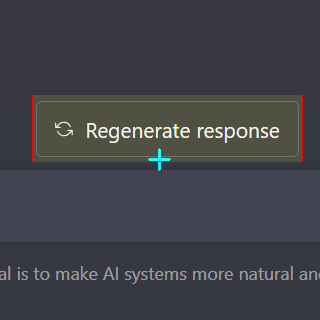

In [89]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVEdEAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRNDgFLQoaUTkLU0AAANDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDVANDVBNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCNDZBNTZCNDZBNTZCNTZBNTZCNDZBNTZCMzVANDVBNDVBNDVBMzVANDVBNDVBQUJQTU9fVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpVlhpUlRkTU9fRUZUMzVANDVBNDVBNDVBMzVANDVBNDZBNTZCNDZCNTZCNDZBOTpHTVBfUlRkPD5LNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBODlGPD5LTU9fUlRkOTpHNDZCNTZCNDZBNTZCMzRAMzVBMzRAMzVBMzRATU9fSUtaNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBODlGRUZVTU9fMzRAMzVBMzRAMzVBNDVBNDZCNDVBNDZCQUJQTU9fNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBODlGTU9fQUJQNDZCNDVBNDVCNDVANDZBNDVANDZBSUpaQUJQNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBPD5LTU9fNDZBNDVANDZBNDVBNDVCNDVBNDZCUlRkODlGNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBODlGUlRkNDZCNDVBNDVCNDVANDVANDVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVANDVANDVANTZBNTZBNTZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTZBNTZBNDVANDVANDVANDVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVBNDVANDVANDZBNTZBNTZBNTZCVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZCNDZBNTZBMzVANDVAMzVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVAMzVAMzVANDVBNDZBNDZBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVBNDZBNDVANDVANDVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVANDVANDVANDVBNDZBNDVBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVBNDZBNDVBNDVBNDVBNDVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVBNDVBNDVBNTVBNTVBNTVBNTVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTVBNTVBNTVBNDVANDVANDVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVANDVANDVANTZBNTZBNTZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTZBNTZBMzVANDVAMzVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVAMzVANDVANDZBNTZBNDZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNDZBNTZBNDVANTVANDVANTVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVSUlVXV5pXV5pNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTVANDVANTVANDZBNDZBNDZBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBXV5pNDVBNDVBNDVBNDVBhoeSxMTP2dnjxMTPxMTP2dnjxMTPhoeSNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZBNDZBNDVBNDZBNDVBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBxMTPXV5pNDVBNDVBsLC6xMTPhoeSNDVBNDVBNDVBSUlVcnJ+xMTPxMTPNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnj2dnj2dnj2dnj2dnjzsXDlG9hNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVBNDZBNTVBNTZBNTVBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBxMTPXV5pSUlVsLC6sLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVsLC6m5umNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnexLjIubjIubjIvsXe2dnj2dnetIVWNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBT4W5vsreuZBBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTVBNTZBNDVBNDZBNDVBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBxMTPcnJ+sLC6sLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVxMTPcnJ+NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBQ3i5ytnj2ce0ZDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVBNDZBNTVBNTZBNTVBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBxMTPxMTPxMTPSUlVSUlVNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBcnJ+xMTPNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNDVWlL3j2dnIjjVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTVBNTVBMzVBNDVBNDVBNDVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBsLC62dnj2dnj2dnj2dnjm5umNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBQ2+qtMXZ2dnj2dnj2dTZuZaFQzVBNDVBNDVBNDVBNDVhb5bIytTj2dnj2dnjyr2veUekudnj2bqkNDVBNDVBNDVBNDVBP16apL3Z1Nfj2dnj2dfZvqeaX0BBNDVBNDVBNDWKqczj2cy5b0CFlLLUztfj2dnj2dTZuZOFPzVBNDVBNDVBNDVBNDVBQ2+qtMXZ2dnj2dnj2dTZuZaFQzVBNDVBNDVBNDWkudnj2bqkNFmaqcHe2dnjyqWFNDVBNDVWX4O0vsre2dnj2dnj2dfZvqeaWDVBNDVBNHG5ztnj2dnj2dnj2dnj2dnj2dnIjjVBNDVBNDVBP16apL3Z1Nfj2dnj2dfZvqeaX0BBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNFmaqcHe2dnjyqWFNDVBNDVBP16apL3Z1Nfj2dnj2dfZvqeaX0BBNDVBNDVBNDVBNFmPmbjZ1Nfj2dnj2dfezsW0eTVBNDVBNDWkudnj2bqkNEeFlLjZ1Nfj2dnj2dTZvqOaWDVBNDVBNDVBNDVBNDVBNDVhb5bDxMze2dnj2dnj2dTZvqyfaUBBNDVBNDVBNDVBNJDI2dnjuZBBWIG0vsrj2dnj2dnjzr+5f1lBNDVBNDVBNDVBNDVWaYu/vsze2dnj2dnj2dHZtI16NDVBNDVBNDVBNEB6hKPIytTj2dnj2dnjzr+5hF5WNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVBMzVBNDVBNDZBNTZBNDZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNDWApMfj2dTDhDVBNDVBNDVBP3O5ytnj2c7UtJ+qlJq5ucfe2dnjyqeKPzVBNDVBNDVwjrre2dnj2czOrp+qlJ+/vszj2crZztnj2bqkNDVBNDVBNDVBNFmkudTj2dfZvqevlJO0rr/Z2dnj1LqkWDVBNDVBNDWKqczj2czDqbre1MfIqZqqmafIztfj2dnetIVWNDVBNDVBNDVBP3O5ytnj2c7UtJ+qlJq5ucfe2dnjyqeKPzVBNDVBNDWkudnj2bqvmcHj2dnj2dnjzqeKNDVBNHG5ztnj2czOrp+qlJO0tMfe2dnjyqWKNDVBNFGKiZOqpL3e2dnjyrCqlJOqlJOUZDVBNDVBNFmkudTj2dfZvqevlJO0rr/Z2dnj1LqkWDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqvmcHj2dnj2dnjzqeKNDVBNFmkudTj2dfZvqevlJO0rr/Z2dnj1LqkWDVBNDVBNFGkudTj2dfZvqy0lJOvqbjU1NnIjjVBNDVBNDWkudnj2b25qcrj2crIqZqqlJ+/vszj2dnj1LikTzVBNDVBNDVBNDWAlL/e2dnj2crIqZqqlJq5ucfe2dnj2cq5dEBBNDVBNDVBNJDI2dnjvqq5ytfZvqy0lJO0tMfe2dnj2cW0ZDVBNDVBNDVBb6XZ2dnj1MfIqZqqlJ+/vszjzqeKNDVBNDVBNDVwjrre2dnjyr25mZOqnqzOztfj2dTIjllBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNDZBNTZBNDVBNTVBNDVBNTVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVSUlVSUlVSUlVNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVWX5PI1NnjyqWKNDVBNDVBNECatNTj1L2qX0BBNDVBNDVBNDVwlL3j2dnUnmJBNDVBP4XD1Nnj1LqkWDVBNDVBNDVBNDVwjrre2dnj2bqkNDVBNDVBNDWAnsXj2cy/eUdBNDVBNDVBNDVWdKrZ2dnjtIVBNDVBNDWKqczj2dnj1LqkWDVBNDVBNDVBP36/ztnj2b+qTzVBNDVBNECatNTj1L2qX0BBNDVBNDVBNDVwlL3j2dnUnmJBNDVBNDWkudnj2czZysq/hGRhNDVBNDVBNDVBNHGvrpqFQzVBNDVBNDVBNECUrs7j2dTDhDVBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBNDWAnsXj2cy/eUdBNDVBNDVBNDVWdKrZ2dnjtIVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2czZysq/hGRhNDVBNDVBNDWAnsXj2cy/eUdBNDVBNDVBNDVWdKrZ2dnjtIVBNDVBT5jO2dnjvpNWNDVBNDVBNDVBP156WDVBNDVBNDWkudnj2dnjzqyPQzVBNDVBNDVBNEB6mcHj2dnernhBNDVBNDVBZJ/U2dnjyqeKPzVBNDVBNDVBNDVWaZ/U2dnjzqyPNDVBNDVBNJDI2dnj2dnZqXNWNDVBNDVBNDVwmcHj2dnernhBNDVBNDWUrtHj2cy5dDVBNDVBNDVBNDVhX15rNDVBNDVBZJ/U2dnZrnhhNDVBNDVBNDVBP3O5ztnj1LWaNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTVBNDVBNTVBNDZBNDZBNDZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBm5um2dnj2dnj2dnj2dnjsLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnexLjIubjIubjIvsrj2dnjzrKfWDVBNDVBNDVBT5bO2dnZqXFBNDVBNDVBNDVBNDVBNIXD1NnjvpNWNDVrlL/j2dnOlFFBNDVBNDVBNDVBNDVBNHG5ztnj2bqkNDVBNDVBNHi/ztnjuZBWNDVBNDVBNDVBNDVBNGK0xNnjzqqKNDVBNDWKqczj2dnOmVFBNDVBNDVBNDVBNDWUrtHj2cy5dDVBNDVBT5bO2dnZqXFBNDVBNDVBNDVBNDVBNIXD1NnjvpNWNDVBNDWkudnj2dnUpGZBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBNHi/ztnjuZBWNDVBNDVBNDVBNDVBNGK0xNnjzqqKNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2dnUpGZBNDVBNDVBNDVBNHi/ztnjuZBWNDVBNDVBNDVBNDVBNGK0xNnjzqqKNDVBT5jO2dnjxJpwNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2dTDiUBBNDVBNDVBNDVBNDVBNH6/1NnjzqqKNDVBNDWPrs7j2c6/eTVBNDVBNDVBNDVBNDVBNDWPrs7j2dG/fzVBNDVBNJDI2dnj1LCUNDVBNDVBNDVBNDVBT5jO2dnjvpNWNDVBNDWUrtHj2dHDf0BBNDVBNDVBNDVBNDVBNDVBNDWPrs7j2bqkPzVBNDVBNDVBNDVBNDV6nsXj2cy5dDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNDZBNDZBNDZANDZBNDZANDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBsLC6cnJ+NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBsLC62dnjsLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnj2dnj2dnj2dnj2dfZroNrNDVBNDVBNDVBNDVBhLXj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnjzqeKNDWUrtHj2cq5aTVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBX5/U2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2bqkNDVBNDWKqczj2cy5dDVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBhLXj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnjzqeKNDVBNDWkudnj2cy5bzVBNDVBNDVBNDVBNDVBNDVBNEeAf420rrjIvsre1NTj2dnj2dnZqXFBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBX5/U2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2cy5bzVBNDVBNDVBNDVBX5/U2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2bqkNDVBNFmkudTj2dneyrKvf2RhNDVBNDVBNDVBNDVBNDWkudnj2cGvTzVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNGK0xNnj1LWaNDVBNDVBNDVBNDVBNDVBNDVBjrjj2dnUnmJBNDVBNJDI2dnjvpNWNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDVWdKfZ2dnj2czIqY2KT0BBNDVBNDVBNDVBNGK0xNnj2dnj2dnj2dnj2dnj2dnj2dnj2dnj2dnIjjVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZANDZBNDVANDZBNDZANDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBcnJ+xMTPNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBsLC6xMTPcnJ+sLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVWT3OvvtHj2dnZqXNWNDVBNDVBNDVBjrrj2dnUrpOqlJOqlJOqlJOqlJOqlJOqlJOqiXNrNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBb6fZ2dnevqOqlJOqlJOqlJOqlJOqlJOqlJOqlH6ANDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBjrrj2dnUrpOqlJOqlJOqlJOqlJOqlJOqlJOqiXNrNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBWInDztnj2dnj1MzUvrjIrp+qrsfj2dnZqXFBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBb6fZ2dnevqOqlJOqlJOqlJOqlJOqlJOqlJOqlH6ANDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBb6fZ2dnevqOqlJOqlJOqlJOqlJOqlJOqlJOqlH6ANDVBNDVBP16aqb/e2dnj2dnj1MfDlGlWNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNHG5ztnjzqeKNDVBNDVBNDVBNDVBNDVBNDVBb6fZ2dnZqXFBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDVBNDVhb5bIytfj2dnj2dfZvqOaWDVBNDVBNHG5ztnj1L20lJOqlJOqlJOqlJOqlJOqlJOqlJOUZDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVANDZBNDZANDZBNDZBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVhoeSxMTPNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVsLC6xMTPNDVBcnJ+sLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNHG5ytnj2cq5dEBBNDVBNDVBjrjj2dnZpGtBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2cGvTzVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBaaXZ2dnjuY1BNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBjrjj2dnZpGtBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNECftNTj2cy/eUdBNDVBNDVBNDVBjrrj2dnZqXFBNDVBNDVBb6fZ2dnjuZBBNDVBNDVBNDVBaaXZ2dnjuY1BNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBaaXZ2dnjuY1BNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBP16UmbLU1Nnj2dnUnmZBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNGK0xNnj2bikNDVBNGu5ytnj1LWaNDVBNDVBNDVBNDVBNDVBNDVBhLXj2dnOmVFBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDVBNDVBNDVBNDVhb425vszj2dnj1LWaPzVBNGu5ytnj2bikNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZANDZBNTVANTZBNTVANTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVm5umxMTPhoeSNDVBNDVBNDVBSUlVhoeSxMTPsLC6NDVBNDVBcnJ+sLC6NDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBb6XZ2dnjyqeKPzVBNDVBX5/U2dnjxJhrNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWFpMrj2dTDiUBBNDVBNDVBNDVBNDVBP4nD1Nnj2bqkNDVBNDVBNIXD1Nnj1LCUNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBX5/U2dnjxJhrNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNHG5ztnjzqeKNDVBNDVBNDVBNDV6nsXj2dnZqXFBNDVBNDVBaaXZ2dnjuZBBNDVBNDVBNDVBNIXD1Nnj1LCUNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNIXD1Nnj1LCUNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBWJPO1NnjyqWFNDVBNDWkudnj2dG/fzVBNDVBNDVBNDVBNDVBT5bO2dnjxJhrNDVBNDWatNTj2c6/eTVBNDVBNDVBNDVBNDVBNDWPrs7j2c6/eTVBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDVBNDVBNDVBNDVBNDVBNECKqczj2dnIjjVBNDWatNTj2dG/fzVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTVANTZBNDVANDVBNDVANDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBcnJ+sLC6xMTPxMTP2dnj2dnjxMTPhoeSNDVBNDVBNDVBSUlVSUlVNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNECKqczj2dnZpHFBNDVBNGa0xNnj2dTIjllBNDVBNDVBNDVBNEePqaOfNDVBNDVBZKPU2dnjyqeKPzVBNDVBNDVBNECKqcrj2dnj2bqkNDVBNDVBNECatNTj2dnZqXNWNDVBNDVBNDVBNEB6lKWvaTVBNDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBNGa0xNnj2dTIjllBNDVBNDVBNDVBNEePqaOfNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNHG5ztnj1LWfPzVBNDVBNDVBWJDI1Nnj2dnZqXFBNDVBNDVBNJDI2dnjxJhrNDVBNDVBNDVBNECatNTj2dnZqXNWNDVBNDVBNDVBNEB6lKWvaTVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNECatNTj2dnZqXNWNDVBNDVBNDVBNEB6lKWvaTVBNDVBT156QzVBNDVBNDVBNDVBNH6/1NnjxJ96NDVBNDWkudnj2dnjxJ+FPzVBNDVBNDVBNFmkudTj2dTIjlFBNDVBNDVBb6fZ2dnjyqeKPzVBNDVBNDVBNDVWaZ/U2dnjxJ+ANDVBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDVwX15WNDVBNDVBNDVBNDVrmcHj2dTDhDVBNDVWhLXe2dnjyqeKPzVBNDVBNDVBNDVWX5O5mWtBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDVANDVBNDZANTZBNTZANTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBSUlVXV5pXV5pNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNDVBP36/ztnj2cq5bzVBNDVWdKXU2dnj2dfZvqy0lJOvqbjUztfj2bqkNDVBNDVBNECKqcrj2dnj1MfDnpOqmafIytHj1LLDvtnj2bqkNDVBNDVBNDVBWJDI1Nnj2dneyri5mZOqnqzOytfj2cy5bzVBNDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBNDVWdKXU2dnj2dfZvqy0lJOvqbjUztfj2bqkNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDWKpMrj2dnjzr25mZOvqbjU1NfUxMfj2dnZqXFBNDVBNDVBNGa0ytnj2dTUrpqqnri/jjVBNDVBWJDI1Nnj2dneyri5mZOqnqzOytfj2cy5bzVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBWJDI1Nnj2dneyri5mZOqnqzOytfj2cy5bzVBNDVBb6fZ2dfZvqy0lJOqmafIytTj2dTIjllBNDVBNDWkudnj2cHIudTjzr+/npOqmafIytfj2dneuZBwNDVBNDVBNDVBNECKpMfj2dnj2crIqZqqlJq5ucXe2dnj1LqkWDVBNDVBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDWkudnjzsXIqZqqlJO0rsHZ2dnjyqeKPzVBNDVBNFmkudHj2dnj1MfIqZqqlJ+/vsrj2dnZqXFBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNDZANTZBMzVANDVBNDVANDVBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBjrrj2dnIjjVBNDVBNDVBNDVBNDVBNDVWhLXe2dnjxJ+ANDVBNDVWX4O5vsze2dnj2dnj2dTZxLKqb0dBNDVBNDVBNDVBNEeFlLjZ1Nfj2dnj2dTZvqOaWDWkudnj2bqkNDVBNDVBNDVBNDVBQ2+qucre2dnj2dnj2dfeyr20hF5WNDVBNDVBNDWKqczj2cy5bzVBNDVBNDVBNDVBNDWKqczj2dnIjjVBNDVBNDVBNDVWX4O5vsze2dnj2dnj2dTZxLKqb0dBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNFmaqb/Z2dnj2dnj1MrIlGlWjrrj2dnZqXFBNDVBNDVBNDVWaZPIytfj2dnj2c6/hDVBNDVBNDVBQ2+qucre2dnj2dnj2dfeyr20hF5WNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBQ2+qucre2dnj2dnj2dfeyr20hF5WNDVBNDVBT360vsre2dnj2dnj2dfeyr20hF5WNDVBNDVBNDWkudnj2bqkP2mqucre2dnj2dnj1MrIpIFwNDVBNDVBNDVBNDVBNDVBNEB6hKPIytHj2dnj2dnj2c7UtJaFQzVBNDVBNDVBNDVBNJDI2dnjuZBBNDVBNDVBNDVBNDVBNJDI2dnjzqeKNDVBNDWAjrLUztTj2dnj2dnj1MzUtJaFQzVBNDVBNDVBNDVBNEeFlLjZ1Nfj2dnj2dnj1MrIpIN6PzVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVBMzVANDVBNDZBNTZCNDZBNTZCVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNGK0xNnj1LWaNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZCNDZBNTZCNDVANDVANDVANDVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBT5bO2dnjxJhrNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDVANDVANDVANDZBNDZBNDZBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBP16qudTj2dTIjlFBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZBNDZBNDZANDZANDZANDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNJDI1MzUvri/npOqlJO0rr3U1Nnj2dneuZBwNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZANDZANTZBNTZBNTZBNTZCVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNGSkrr/Z1NTj2dnj2dnj2dfeyr25jm9hNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDWkudnj2bqkNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZCNTZBNTZBNDVANDZANDZANDZAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZANDVANDZANTVANTZANTVANTZAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZANTVANTZANDVANDZANDVANDZAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZANDVANDZANDZBNTdBNTZBNTdBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTdBNDZBNTdBNDVANDVANDVANTVAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTVANDVANDVANDZBNDZBNDZBNDZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZBNDZBNDZBNDZANDZANDZANDZAVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNDZANDZANDZANTZBNTZBNTZBNTZBVlhpNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBNDVBVlhpNTZBNTZBNTZBNDY/NDY/NDY/NDY/UFJiODlFNDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVAVVdoNDY/NDY/NDY/NTZANTZANTZANTZATE5ePD1KNDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVAQEFPSUpZNTZANTZANTZANTY/NTY/NTY/NTY/QUJOUFJjNDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVANDVATE5ePT5JNTY/NTY/NTY/NDZANDZANDZANDZANDZATE5eREVUMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRASElZTE5eNDZANDZANDZANDZAMzQ/NDU/MzQ/NDU/MzQ/ODlETE5dUFJjOzxKMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRAMzRANzhFOzxKTE5eTE5dNDU/MzQ/NDU/MzQ/NDU/MzVAMzVAMzVANDZAMzVAMzVAMzVAREZTTE5dVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnVVdnUFJiTE5dREZTMzVAMzVAMzVANDZAMzVAMzVAMzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzQ/NDU/MzQ/MzQ/MzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzVAMzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/MzU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/NDU/NDU/NDU/NDU/NDU/NDU/NDU+NDU/lGViS4BLQYaUhpQu''',
    tries = 30,
    timer = 3,
    gate = 1,
    bbox = None,
)

found: [(1219, 1928)]


In [90]:
pr.value = 66
pr.description = "progress 66%"

copy answer

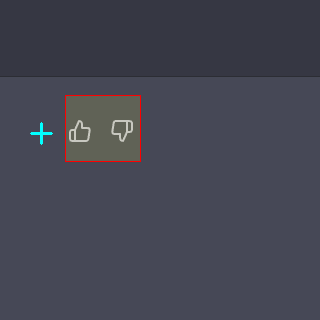

In [91]:
# Jupyter-Automation Step Setup
# Version: 0.1
#
# Default script to be used as a template for copying ready steps to Automation Notebooks
# If the pattern is not found on screen Exception will break the workflow
# by Kaspar Kallas 2023 (kaspar.kana.kallas@gmail.com)
s = step(
    '''gASVQToAAAAAAACMCVBJTC5JbWFnZZSMBUltYWdllJOUKYGUXZQofZSMA1JHQpRLS0tChpROQgI6AABERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6Ofn7GSk6NrbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2F4eYmsrL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6fn7GSk6N4eYlERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6srL6srL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6OsrL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6OsrL54eYmFhZasrL6Sk6NERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlReX2+srL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRRU2FrbXusrL6fn7FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlReX2+srL6srL5ERlRRU2GsrL6fn7FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL6FhZZERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5RU2FERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL6FhZZERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSfn7GsrL5RU2FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5eX29ERlRERlRERlSsrL6srL6srL6srL6srL6srL6srL6fn7F4eYlERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6Sk6NERlRERlRERlRERlSFhZasrL6srL6srL6srL6srL6srL6srL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlReX2+srL6fn7FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2GFhZasrL6srL6srL6srL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2GFhZasrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6OsrL6srL6srL6srL6srL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlR4eYmsrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRrbXusrL6Sk6NERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSfn7GsrL5eX29ERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL54eYlERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL6srL6srL6srL6srL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6srL6srL6srL6fn7F4eYlERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSfn7GsrL5RU2FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2GsrL6srL6srL6srL6srL6srL6srL6srL6fn7FERlRERlRERlRERlSSk6OsrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlReX2+Sk6OsrL6srL6srL6srL6srL6srL6srL5ERlRERlRERlReX2+srL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2GsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSFhZasrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5RU2FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXusrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlSFhZasrL6FhZZERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5ERlRERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSFhZasrL5rbXtERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5eX29ERlSsrL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSsrL6srL5rbXtERlRERlSsrL6srL5ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2Gfn7GsrL5RU2FERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6OsrL6FhZZ4eYmsrL6Sk6NERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSSk6OsrL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6Sk6NERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlReX2+srL6srL6srL6srL5eX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRRU2GFhZasrL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6srL6fn7F4eYleX29ERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRrbXuSk6OsrL6Sk6NERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlRERlSUZWJK6f///0snhpSGlC4=''',
    tries = 3,
    timer = 1,
    gate = 1,
    bbox = None,
)
# Logic here
for i in s.locations:
    gui.moveTo(i)                            # Just move the mouse no click
    time.sleep(0.1)
    gui.click(i, clicks=1, button='left')
    #pyperclip.copy(pyperclip.paste()+'\n')  # Copy selected text, add newline character and copy back to clipboard
    #gui.hotkey(os_ctrl(),'v')               # Keypress events
    #%run ./subworkflowfile.ipynb            # Run another Notebook as subworkflow
    r['answ'] = pyperclip.paste()
    gui.hotkey('F5')                         # reoload the page to start with clean prompt
    print(str(r))

found: [(1745, 572)]
{'answ': ["Looks like they're lighting up the scene like it's nobody's business!", 'The colors in this shot are absolutely popping! 💥', 'Love seeing the creativity and attention to detail in this art photography piece! Keep it up 👏']}


In [92]:
pr.value = 100
pr.description = "progress 100%"
pl.value = "[DONE]"